# Perceptron

In [81]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [9]:
iris = load_iris()
x = iris.data[:,(2,3)]
y = (iris.target == 0)

In [10]:
per_clf = Perceptron()
per_clf.fit(x,y)
per_clf.predict([[2,0.5]])

array([False])

In [4]:
print(tf.__version__)
print(keras.__version__)

2.0.0-rc1
2.2.4-tf


# keras datasets

In [10]:
mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 8s 2us/step


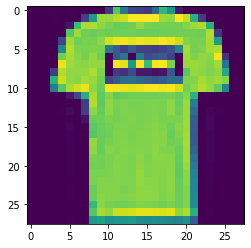

In [24]:
plt.imshow(x_train_full[1,:])

In [38]:
x_train_full.shape
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

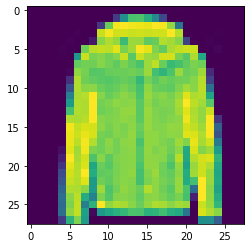

In [41]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]
plt.imshow(x_train[0])

# MLP Classification Sequential API

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')  #the output has 10 classes = 10 nodes or nuerons
                                ])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.layers

In [49]:
hidden1 = model.layers[1]

In [51]:
hidden1.name

'dense'

In [54]:
weights, bias = hidden1.get_weights()
weights.shape

(784, 300)

In [55]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [61]:
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 14s 262us/sample - loss: 0.2200 - accuracy: 0.9209 - val_loss: 0.2924 - val_accuracy: 0.8948
Epoch 2/30
55000/55000 [==============================] - 14s 256us/sample - loss: 0.2161 - accuracy: 0.9226 - val_loss: 0.2817 - val_accuracy: 0.8994
Epoch 3/30
55000/55000 [==============================] - 13s 230us/sample - loss: 0.2134 - accuracy: 0.9235 - val_loss: 0.3163 - val_accuracy: 0.8854
Epoch 4/30
55000/55000 [==============================] - 13s 230us/sample - loss: 0.2092 - accuracy: 0.9245 - val_loss: 0.2858 - val_accuracy: 0.8940
Epoch 5/30
55000/55000 [==============================] - 16s 283us/sample - loss: 0.2063 - accuracy: 0.9260 - val_loss: 0.2800 - val_accuracy: 0.8974
Epoch 6/30
55000/55000 [==============================] - 13s 229us/sample - loss: 0.2025 - accuracy: 0.9278 - val_loss: 0.2964 - val_accuracy: 0.8892
Epoch 7/30
55000/55000 [=====================

In [62]:
history.history

{'loss': [0.22004034009846773,
  0.2160606687264009,
  0.21335264946547422,
  0.2091863119688901,
  0.2062752192724835,
  0.20252434620640494,
  0.19859097231301395,
  0.1965261407852173,
  0.1926690415111455,
  0.19113991401629016,
  0.1862969727396965,
  0.18334098453738473,
  0.1794787976573814,
  0.1778593035437844,
  0.17412213103987953,
  0.17164449231678788,
  0.16863251403082502,
  0.16577177621559663,
  0.16369168000167067,
  0.16104918727549639,
  0.15761290236169642,
  0.15492223342006856,
  0.15246215352524412,
  0.1495895411849022,
  0.14762958690849218,
  0.14454875638647513,
  0.1429141492198814,
  0.13927694987031547,
  0.13852561002698813,
  0.1360461181981997],
 'accuracy': [0.9209273,
  0.9225818,
  0.9234727,
  0.92447275,
  0.9259818,
  0.9278182,
  0.9291091,
  0.92981815,
  0.9309273,
  0.93143636,
  0.9335091,
  0.9341818,
  0.93554544,
  0.9367818,
  0.9379454,
  0.93883634,
  0.94,
  0.9408,
  0.9419818,
  0.94354546,
  0.94454545,
  0.94503635,
  0.9463636,
 

In [64]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

(0.0, 1.0)

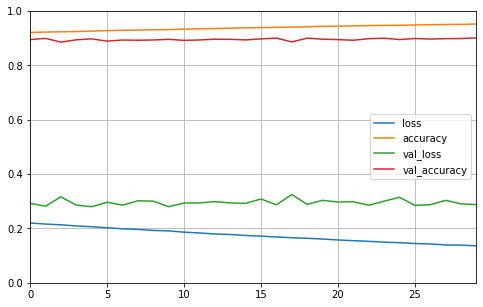

In [75]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [76]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[68.89193623510282, 0.8562]

In [78]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(4)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [79]:
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1], dtype=int64)

In [82]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

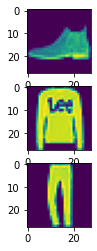

In [86]:
plt.subplot(311)
plt.imshow(x_new[0])

plt.subplot(312)
plt.imshow(x_new[1])

plt.subplot(313)
plt.imshow(x_new[2])